# Práctica 2 – Estática. Registro de distancia y posición
Por Luna Kadysz y Kenneth Syddall

Link a la página de la materia:
https://materias.df.uba.ar/l4a2021c1/practica-11-estatica-registro-de-distancia-y-posicion/






## Actividad 2.1 
### Determinación del módulo de Young

Calcular cuánto se desplaza EL EXTREMO libre de la barra:
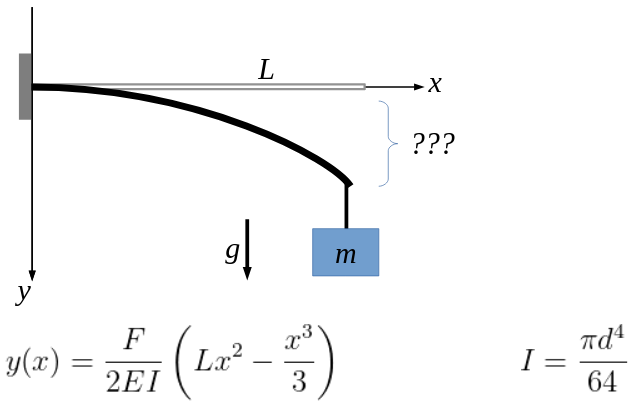

Datos:

E ≅ 10×1010 N/m2

L = 40 cm

d = 5 mm

m = 0.01 kg

Forma de entrega: Sin entrega. Estimar estas dos cantidades y dejar asentado el desarrollo de forma más o menos prolija en el “cuaderno de laboratorio”, sea el fomato que éste último tenga.

## Actividad 2.2 
### Sensores de distancia – longitud:
Elegir la tarea de medición mencionadas en la lista, según su número de grupo (Grupo 14 vuelvea la tarea 1). Para esta tarea, elegir un sistema de medición o sensor para realizarla y justifiquen(puede ser otro sensor que no hayamos mencionado en la clase eh!)

1.Distancia de la superficie de la tierra a una nube o capa de aerosoles atmosféricos

2.Dimensiones edilicias de una fábrica

3.Control del diámetro de agujeros de arandelas en una línea de producción.

4.Deformación por dilatación térmica del bloque del motor de un automóvil.

5.Distancia de la Tierra a la Luna.

6.Control de posición del cabezal de una impresora tipo plotter.

7.Distancia entre un automóvil y un obstáculo para maniobra de estacionamiento.

8.Diámetro de una broca de perforación (mecha) de taladro.

9.Distancia entre vehículos en movimiento para sistemas de conducción autónoma.

10.Diámetro de un cabello humano.


11.Distancia entre pupilas oculares humanas para fabricación de anteojos.

12.Mediciones antropométricas para reconocimiento facial.

13.Medición para realimentación de un sistema de actuadores para control de vuelo o de unbrazo robot.Reportar el intervalo de 
valores de distancias típicas para esa tarea y las precisiones requeridaspara dichas mediciones.

Justificar la elección del sistema de medición. Considerar tanto los rangos y precisiones del siste-ma de medición elegido como los aspectos metodológicos o procedimentales necesarios para rea-lizar la tarea.Buscar un equipo comercial o experimental que sea capaz de realizar la medición. Incluir cita olink al artículo u hoja de datos consultado. Reportar las especificaciones del instrumento o experi-mento que considere útiles para justificar la elección.Forma de entrega: Para la fecha definida en el cronograma, deberán armar una pre-sentación mínima (una, dos o a lo sumo tres diapositivas) describiendo las caracte-rísticas de la tarea a realizar, el sensor o instrumento elegido y una justificación paraello, basados en alguna especificación del mismo.

## Actividad 2.3
### Medición indirecta del tamaño de una rendija:

Conociendo cuánto se deforma el extremo de la barra (lo calcularon en la actividad anterior), y suponiendo que la rendija variable está ubicada en ese extremo de la barra, estimar la distancia necesaria a la  pantalla  para  estar  en  condición  de Fraunhoffer, y cuál sería la distancia entre franjas (o, más correcto, entre los mínimos de intensidad):
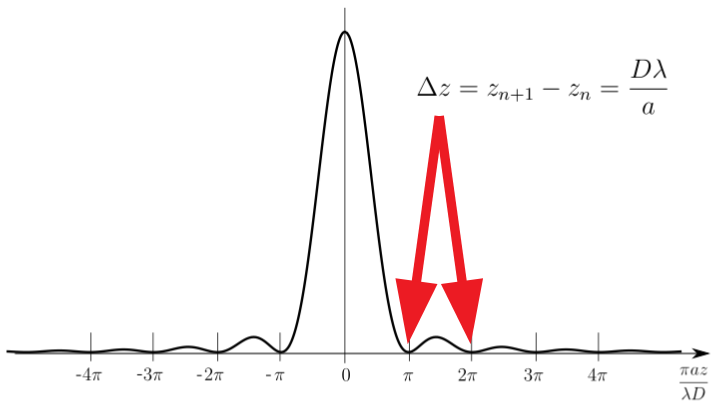
En la condición de Fraunhöffer, el patrón de interferencia está dado por
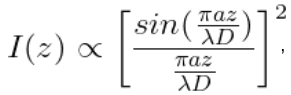
donde a es el tamaño de la rendija, D la distancia a la pantalla, z la coordenada sobre la pantalla y
$\lambda$ la longitud de onda de la fuente de luz utilizada.

Forma de entrega: Sin entrega. Estimar estas dos cantidades y dejar asentado el desarrollo de forma más o menos prolija en el “cuaderno de laboratorio”, sea el fomato que éste último tenga.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
#matplotlib.use('Qt5Agg')
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np

In [2]:
import os

frames = []
colors = ['Red','Green','Blue']
images_dict = {os.path.splitext(k)[0]: {} for k in os.listdir('Datos/datos_laton_laser_rojo') if os.path.splitext(k)[1] == '.jpg'}

#guardo todos los rgb por imagen de la carpeta
for i,file in enumerate(os.listdir('Datos/datos_laton_laser_rojo')):
    ext = os.path.splitext(file)[1] #agarro la extension del archivo
    if ext == '.jpg':
        img = imageio.imread(f'Datos/datos_laton_laser_rojo/{file}')
        images_dict[os.path.splitext(file)[0]] = {k: np.array(img[:,:,i])  for i,k in enumerate(colors)}

            

In [3]:
images_dict.keys()

dict_keys(['datosrojo1', 'datosrojo10', 'datosrojo2', 'datosrojo3', 'datosrojo4', 'datosrojo5', 'datosrojo6', 'datosrojo7', 'datosrojo8', 'datosrojo9', 'grilla_cali_rojo'])

Text(0, 0.5, 'Pixeles[px]')

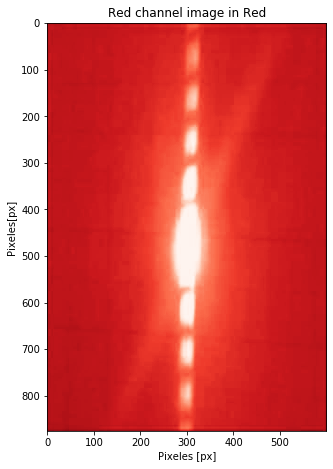

In [4]:
#probamos con rojo 

%matplotlib inline

color = 'Red'
A = images_dict['datosrojo1'][color]
plt.figure(figsize = (9, 7.5))
plt.imshow(A, cmap=plt.cm.Reds_r)
plt.title(f'{color} channel image in {color}')
plt.xlabel('Pixeles [px]')
plt.ylabel('Pixeles[px]')


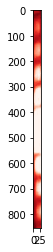

In [6]:
R = ndimage.rotate(A, 2)[15:870,300:330]
Rt = np.transpose(R)
plt.imshow(Rt, cmap=plt.cm.Reds_r)
plt.imshow(R, cmap=plt.cm.Reds_r)

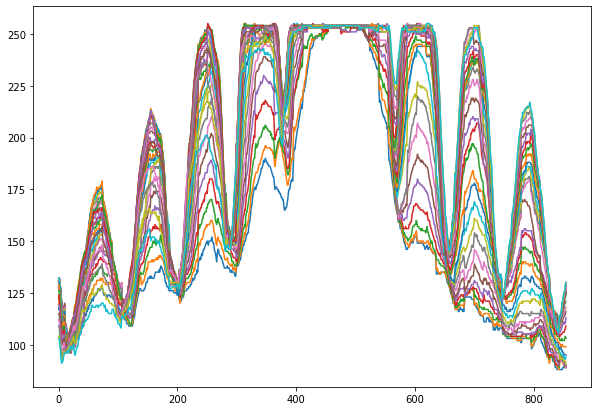

In [7]:
plt.figure(figsize = (10, 7))
for i in range(30):
    plt.plot(range(len(Rt[i])),Rt[i])

In [13]:
def promedio(R):
    mediana = []
    error = []
    for i in range(len(R)):
        mediana.append(np.mean(R[i]))
        error.append(np.std(R[i]))
    return mediana, error 

%matplotlib qt

mediana, error = promedio(R)
plt.plot(range(len(mediana)),-np.array(mediana))
#puntos_x = np.array(plt.ginput(9))
#puntos_x

[ 17 112 201 289 378 472 569 658 748 842]


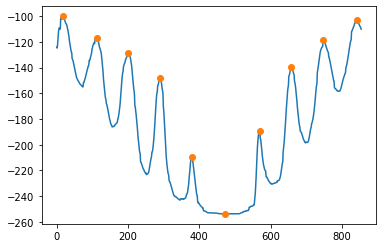

In [68]:
%matplotlib inline
from scipy.signal import find_peaks
plt.figure()
peaks, _ = find_peaks(mediana,distance= 80)
plt.plot(range(len(mediana)),mediana)
plt.plot(peaks, mediana[peaks], "o")
print(peaks)

#plt.axis([0, 160, -1.1, 1.1])

[]


(-17901.8, 370217.8)

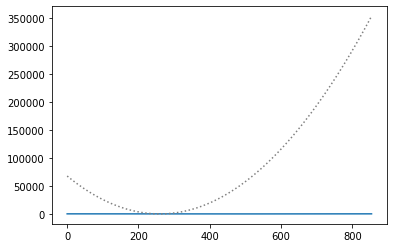

In [73]:
%matplotlib inline
plt.figure()
border = (np.array(range(len(mediana)))-260 )** 2 - 260
peaks, _ = find_peaks(mediana, height= border)
plt.plot(range(len(mediana)),mediana)
plt.plot(peaks, mediana[peaks], "o")
plt.plot(border, ":", color="gray")
print(peaks)
plt.ylim()

In [45]:
p = np.diff(peaks)
print(np.mean(p))

91.66666666666667


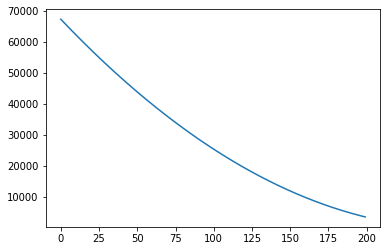

In [72]:
x = np.array(range(200))
plt.plot(x, (x-260)** 2 - 260 )
